In [11]:
import torch
import numpy as np
import random
import os
from torch import nn
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
os.listdir(".")
dwc = pd.read_csv("cooling.csv", sep='\t')#data with cooling
dwoc = pd.read_csv("cooling_out.csv", sep='\t')#data wiithout cooling

In [4]:
dwc.head()

,Параметр размера распределения Росина- Раммлера. м,Параметр ширины распределения Росина - Раммлера,Диаметр представительных частиц. м,Скорость ввода завесного охлаждения. м/с,Осевая компонента скорости,Радиальная компонента скорости,Тангенциальная компонента скорости,Средний диаметр Заутера. м,Расходный комплекс. м/с,Давление. Па
0,0.000070,11.331890,0.000163,1.947487,3.106326,1.288388,2.237261,0.000069,1167.793,702494
1,0.000062,9.900000,0.000147,1.700000,2.850000,0.950000,2.460000,0.000061,1165.938,701378
2,0.000070,11.331890,0.000130,1.947487,2.593674,1.288388,2.237261,0.000069,1315.299,791227
3,0.000054,8.468109,0.000163,1.947487,2.593674,1.288388,2.682739,0.000053,1173.714,706056
4,0.000054,8.468109,0.000130,1.452513,2.593674,1.288388,2.682739,0.000053,1177.873,708558


In [5]:
names = [i for i in dwc]
x_names = names[:-2]
y_names = names[-2:]
data = dwc.as_matrix()
X = data[:, :8]
Y = data[:, -2:]
print X.shape, Y.shape

(160, 8) (160, 2)


In [6]:
Y.mean()

383647.1459375

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
        
    def forward(self, x):
        return self.layers(x)
        

In [41]:
names = [i for i in dwc]
x_names = names[:-2]
y_names = names[-2:]
data = dwc.as_matrix()
X = data[:, :8]
Y = data[:, -1:]

ssx = SS()
Xs = ssx.fit_transform(X)

ssy = SS()
Ys = ssy.fit_transform(Y)

Y = Ys
X = Xs

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.10, random_state=43)
#x_train.reshape(107, 1, 8)
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
test_y = torch.from_numpy(test_y).type(torch.FloatTensor)

In [42]:
net = Net()
batch_size = 10
loss_fn = torch.nn.MSELoss()
net_opt = torch.optim.Adam(net.parameters(), lr=0.001)
L = []
L_test = []
L_train = []

Current loss: 0.13605672121 epoch: 980 iteration: 1400                                              

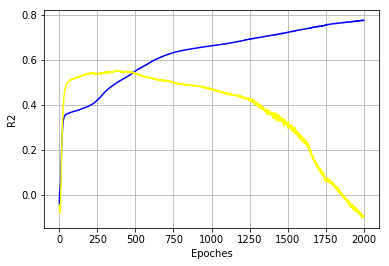

In [44]:
for i in xrange(1000):
    for j in xrange(0, len(train_x), batch_size):
        X = Variable(train_x[j:j + batch_size])
        Y = Variable(train_y[j:j + batch_size], requires_grad=False)

        out = net.forward(X)

        loss = loss_fn(out, Y)

        if i % 20 == 0:
            print '\r', 'Current loss:', loss.data[0], "epoch:", i, "iteration:", j, 
        L.append(loss.data[0])

        net.zero_grad()

        loss.backward()

        net_opt.step()
   
    a = net.forward(Variable(test_x))
    r2 = r2_score(test_y.numpy(), a.data.numpy())
    
    
    L_test.append(r2)
    
    b = net.forward(Variable(train_x))
    r2 = r2_score(train_y.numpy(), b.data.numpy())
    L_train.append(r2)
    #np.corrcoef(b.data.numpy().T, train_y.numpy().T)
    
    
plt.plot(range(len(L_train)), L_train, c="blue")
plt.plot(range(len(L_test)), L_test, c="yellow")

plt.grid()
plt.xlabel("Epoches")
plt.ylabel("R2")
        

In [45]:
max(L_test)

0.55371360658609181

In [46]:
max(L_train)

0.77651317764140948

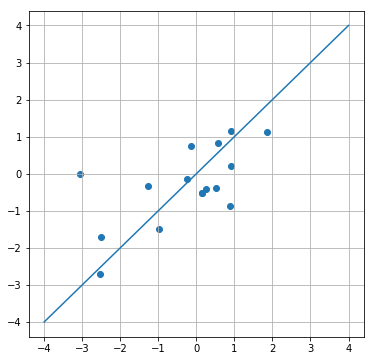

In [56]:
b = net.forward(Variable(test_x))
b.data.numpy(), test_y.numpy()
plt.figure(figsize=(6, 6))
plt.scatter(b.data.numpy(), test_y.numpy())
plt.grid()
plt.plot([-4, 4], [-4, 4])

In [101]:
4515**2

20385225

In [47]:
a = net.forward(Variable(test_x))
np.corrcoef(a.data.numpy().T, test_y.numpy().T)

array([[ 1.        ,  0.63475482],
       [ 0.63475482,  1.        ]])

In [48]:
b = net.forward(Variable(train_x))
np.corrcoef(b.data.numpy().T, train_y.numpy().T)

array([[ 1.        ,  0.88179652],
       [ 0.88179652,  1.        ]])